<a href="https://colab.research.google.com/github/Nicolaser1102/Algoritmos_aprendizaje_no_supervisado/blob/main/Tareas_Week4/Algoritmos_aprendizaje_no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODING DOJO 
## Fecha creación:22/2/2022
## Fecha de actualización: 22/2/2022
## Esteban Simbaña

#¿Qué algoritmo de Agrupamiento es mejor?

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
#Importamos librerías que ocuparemos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [151]:
#Montamos la base de datos
nombrearchivo = '/content/drive/MyDrive/Coding Dojo/Códigos/Track 2 /Week4-Track 2/cust_seg.csv'
df = pd.read_csv(nombrearchivo)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


## Limpieza de datos

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [153]:
#Verificamos si los niveles de educación están convertidos en variables numéricas 
df['Edu'].unique()

array([2, 1, 3, 4, 5])

In [154]:
#Verificamos que datos hay en la columna donde faltan datos
df['Defaulted'].unique()

array([ 0.,  1., nan])

In [155]:
#Observamos cuantos valores de cada uno tienen
df.groupby('Defaulted').count()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Defaulted,,,,,,,,,
0.0,517,517,517,517,517,517,517,517,517
1.0,183,183,183,183,183,183,183,183,183


Debido a que la mayoría de datos en la columna 'Defaulted' sin **0.0** procedemos a imputar ese valor en la base de datos 

In [156]:
#Impuitamos los valores 
df = df.fillna(0.0)

In [157]:
#Verificamos si ya no hay datos faltantes
df.isnull().sum()

Unnamed: 0         0
Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

Finalmente, eliminamos la columna 'Unnamed' que representa a los índices

In [158]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


Dividimos al df con las características que neceistamos para el modelo:


- Edad del cliente
- La educación
- Los años de empleo
- Los ingresos
- La deuda
- Si incumplieron la deuda 
- La relación deuda: ingresos



Reaizamos un df con todas las características excepto 'Customer ID' y 'Other Debt'

In [159]:
#Se muestran los nombres de las columnas
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [160]:
df1 = df.loc[:,['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
          'Defaulted', 'DebtIncomeRatio']]
df1.head()

,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,0.0,6.3
1,47,1,26,100,4.582,0.0,12.8
2,33,2,10,57,6.111,1.0,20.9
3,29,2,4,19,0.681,0.0,6.3
4,47,1,31,253,9.308,0.0,7.2


Listo, tenemos la base de datos lista para la implementación de modelos

##Tarea 
Parte 1

- Utiliza KMeans, agrupación jerárquica, y DBSCAN para crear varios segmentos de clientes.

Conjunto de datos que se utilizarán para los algoritmos

In [161]:
#Datos X
df1.head()

,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,0.0,6.3
1,47,1,26,100,4.582,0.0,12.8
2,33,2,10,57,6.111,1.0,20.9
3,29,2,4,19,0.681,0.0,6.3
4,47,1,31,253,9.308,0.0,7.2


Se escalan los datos

In [162]:
#Instanciamos el escalador
scaler = StandardScaler()
#Ajustamos y transformamos los datos
X = scaler.fit_transform(df1)

## Implementación algoritmo KMeans

### Se busca el número óptimo de clusters
En este caso, el algoritmo Kmean nos servirá como punto de partida para ver cuál sería el número óptimo de 'clusters'

In [163]:
#Importamos librería para poder utilizar algoritmo KMeans y el puntaje silueta
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [164]:
silueta_puntajes = [] #lista que contendrá los puntajes silueta
for i in range(2, 12):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(X)
  silueta_puntajes.append(silhouette_score(X, kmeans.labels_))

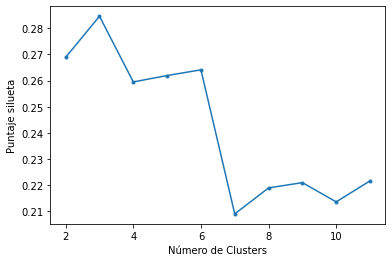

In [165]:
# Visualización de los scores
plt.plot(range(2, 12), silueta_puntajes, marker = '.')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje silueta');

Para visualizar mejor los datos procedemos a crear una nueva lista y mejorar el gráfico

In [166]:
lista_num_clusters = list(range(2, 12))

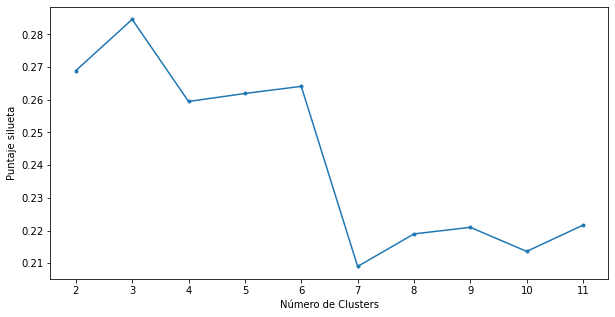

In [167]:
# Visualización de los scores
plt.figure(figsize= (10,5))
plt.plot(lista_num_clusters, silueta_puntajes, marker = '.')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntaje silueta')
plt.xticks(lista_num_clusters) #para mostrar todos los números en las etiquetas de 'x'
pass

Como podemos ver en la gráfica el número óptimo son **3 clusters**

##  Implementación algoritmo KMeans

In [168]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
silhouette_score(X, kmeans.labels_)

0.2845972190699849

## Implementación algoritmo de agrupación por jerarquización (AgglomerativeClustering) 

In [169]:
#Importamos librería para poder utilizar algoritmo AgglomerativeClustering y el puntaje silueta
from sklearn.cluster import  AgglomerativeClustering

In [170]:
hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(X)
silhouette_score(X, hc.labels_)

0.22692996428062176

Implementación algoritmo DBSCAN

In [171]:
#Importamos librería para poder utilizar algoritmo DBSCAN y el puntaje silueta
from sklearn.cluster import DBSCAN

In [172]:
dbs = DBSCAN(eps = 0.5, min_samples = 5).fit(X) #utilizamos los mismos parámetros por defecto del algoritmo
silhouette_score(X, dbs.labels_)

-0.27541881489821196

'Jugando' con los parámetros se obtuvo un puntaje alto para el modelo implementado con el algoritmo DBSCAN. 

In [173]:
dbs1 = DBSCAN(eps = 4, min_samples = 2).fit(X) #se le asignan nuevos parámetros
silhouette_score(X, dbs1.labels_)

0.7352747813763814

## Parte 2

- ¿Qué algoritmo de agrupación en clústeres es mejor para estos datos y por qué?

R = 

1. El mejor algoritmo para este conjunto de datos es **DBSCAN**, ya que principalmente obtuvimos un puntaje cercano a uno, lo que afirma que el modelo está bien.

2. Los otros algoritmos (KMeans , AgglomerativeClustering) obtuvieron puntajes por debajo del 0.30, obteniendo previamente el número de clusteres óptimo.